# Get data from CORDEX models for Lisbon
- import data from csv files
- plot time series
- visualize time series
- some preliminary stats

In [1]:
# Load auxiliar functions and configurations
%run utils_v6.ipynb

In [2]:
# Configurations used in this NB

print('cordex_dataset_path', cordex_dataset_path, sep='\t')
print('cordex_output_path', cordex_output_path, sep='\t')

print('seasons_dict', *seasons_dict.items(), sep='\n\t')
print('cordex_start_year\t', cordex_start_year)
print('cordex_hour_interval\t ',cordex_hour_interval)
print('cordex_temp_filename\t', cordex_temp_filename)

cordex_dataset_path	..\data\cordex
cordex_output_path	..\data\cordex\output
seasons_dict
	('DJF', [12, 1, 2])
	('MAM', [3, 4, 5])
	('JJA', [6, 7, 8])
	('SON', [9, 10, 11])
cordex_start_year	 1971
cordex_hour_interval	  3
cordex_temp_filename	 Forc2m_TA.txt


In [3]:
folders, nmodels = select_models_folders(cordex_dataset_path)
folders, nmodels

(['CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63_v2',
  'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_DMI-HIRHAM5_v2',
  'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_SMHI-RCA4_v1',
  'ICHEC-EC-EARTH_historical_r12i1p1_SMHI-RCA4_v1',
  'ICHEC-EC-EARTH_historical_r3i1p1_DMI-HIRHAM5_v2',
  'IPSL-IPSL-CM5A-MR_historical_r1i1p1_SMHI-RCA4_v1',
  'MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-6_v1',
  'MOHC-HadGEM2-ES_historical_r1i1p1_SMHI-RCA4_v1',
  'MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1_v1',
  'MPI-M-MPI-ESM-LR_historical_r1i1p1_DMI-HIRHAM5_v1',
  'MPI-M-MPI-ESM-LR_historical_r1i1p1_ICTP-RegCM4-6_v1',
  'MPI-M-MPI-ESM-LR_historical_r1i1p1_SMHI-RCA4_v1a',
  'MPI-M-MPI-ESM-LR_historical_r3i1p1_GERICS-REMO2015_v1',
  'NCC-NorESM1-M_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1_v1',
  'NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3',
  'NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1',
  'NCC-NorESM1-M_historical_r1i1p1_SMHI-RCA4_v1'],
 17)

### Build a dataframe with all models

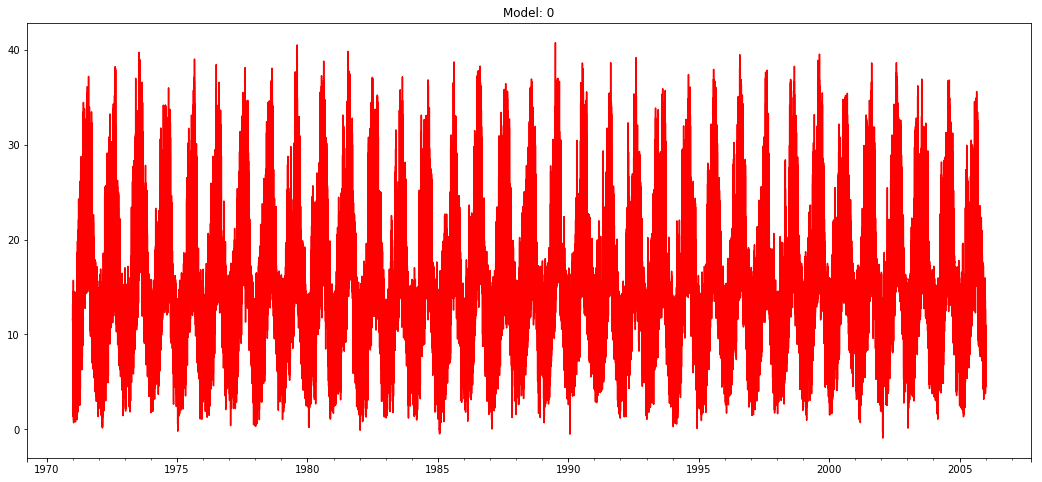

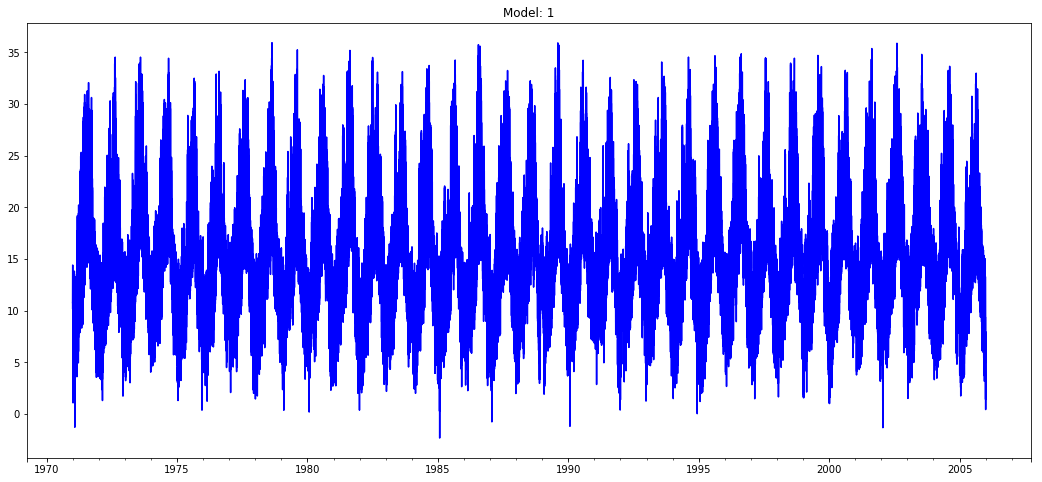

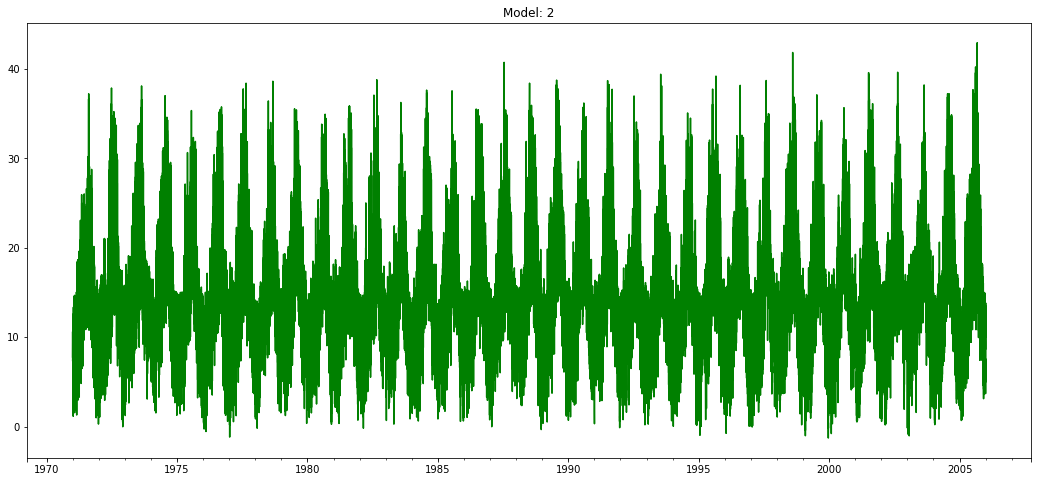

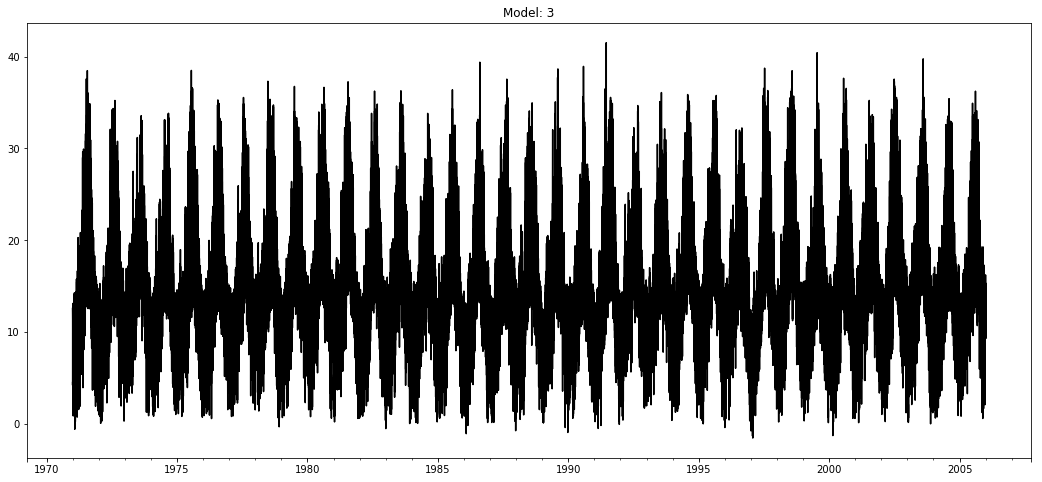

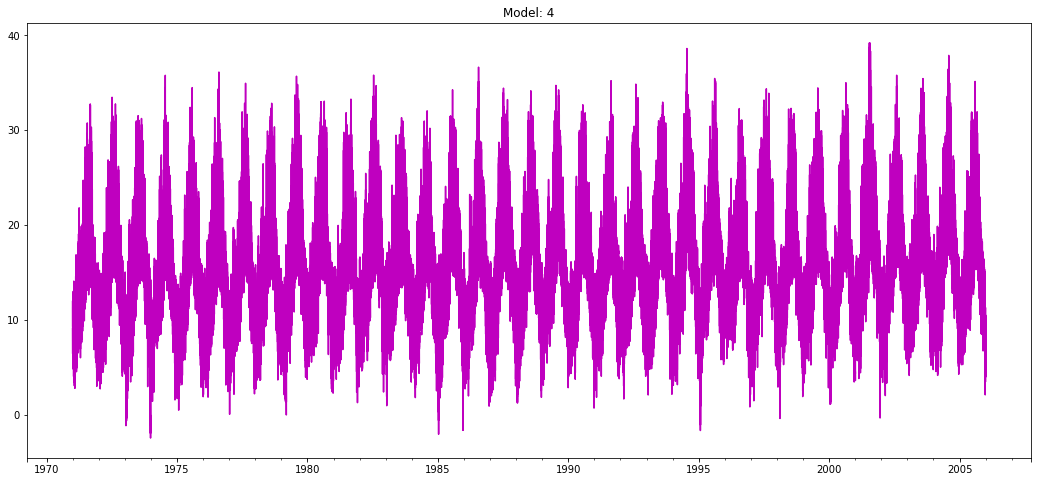

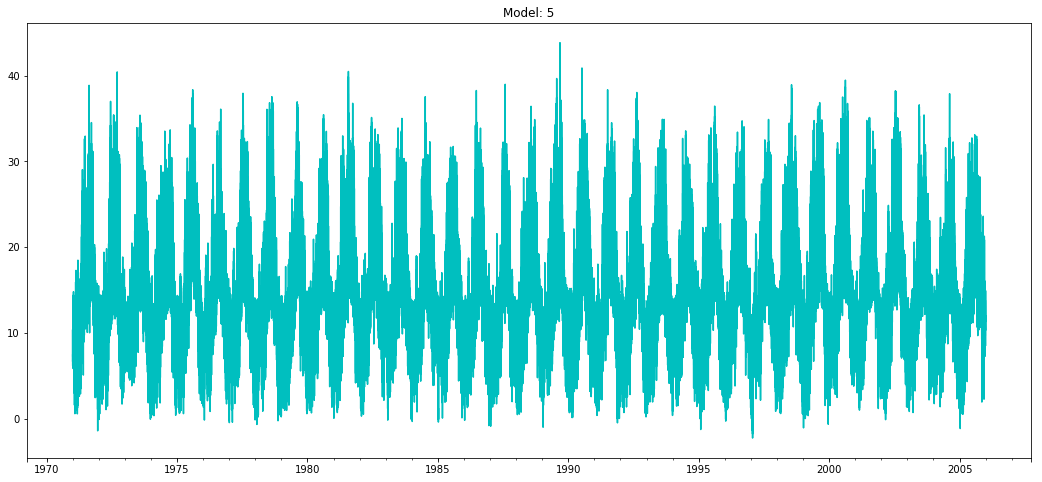

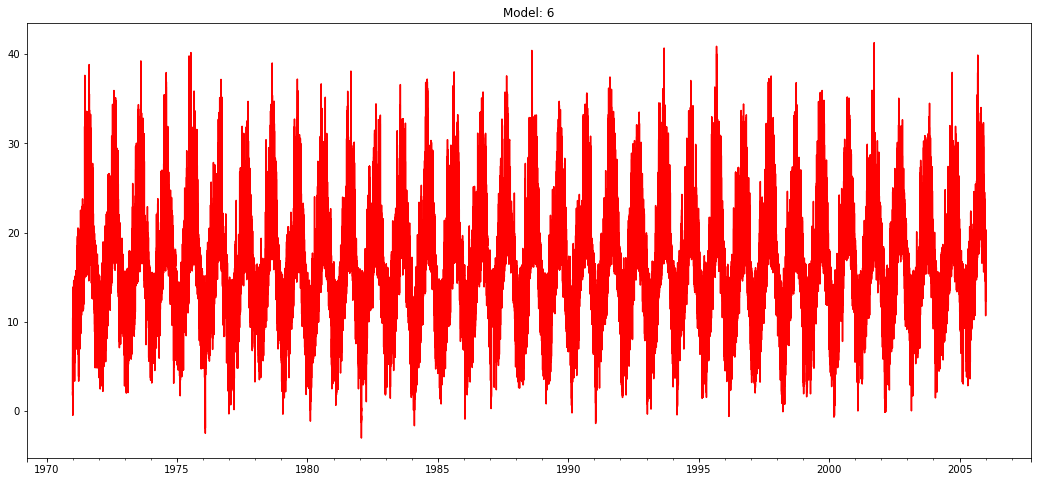

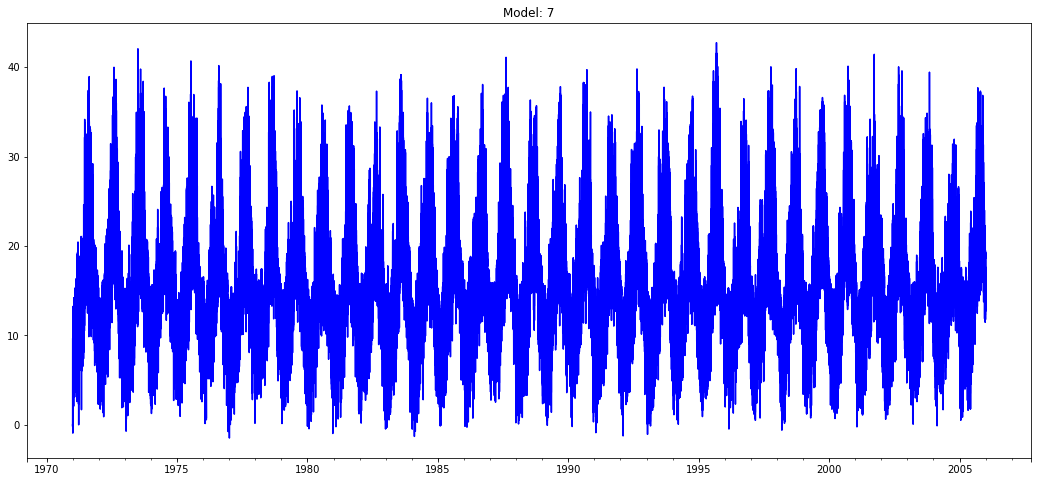

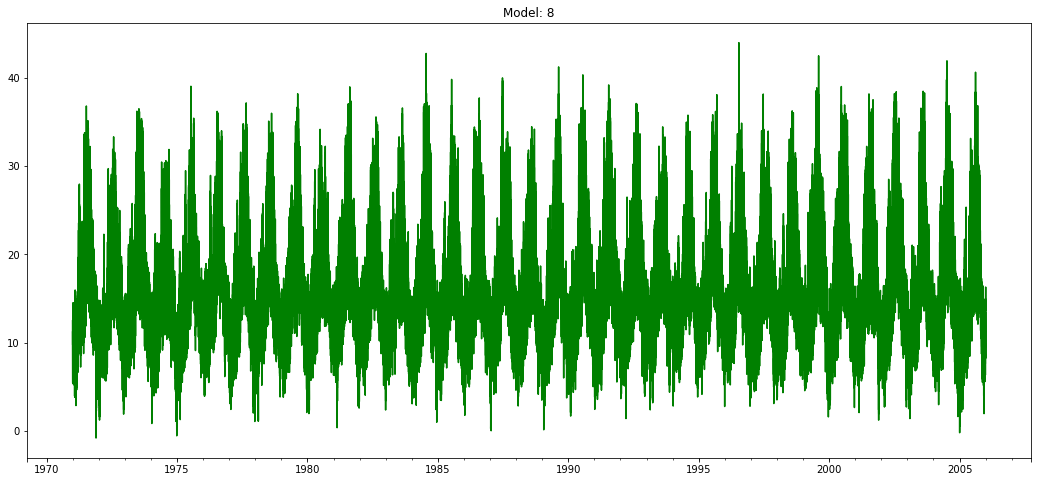

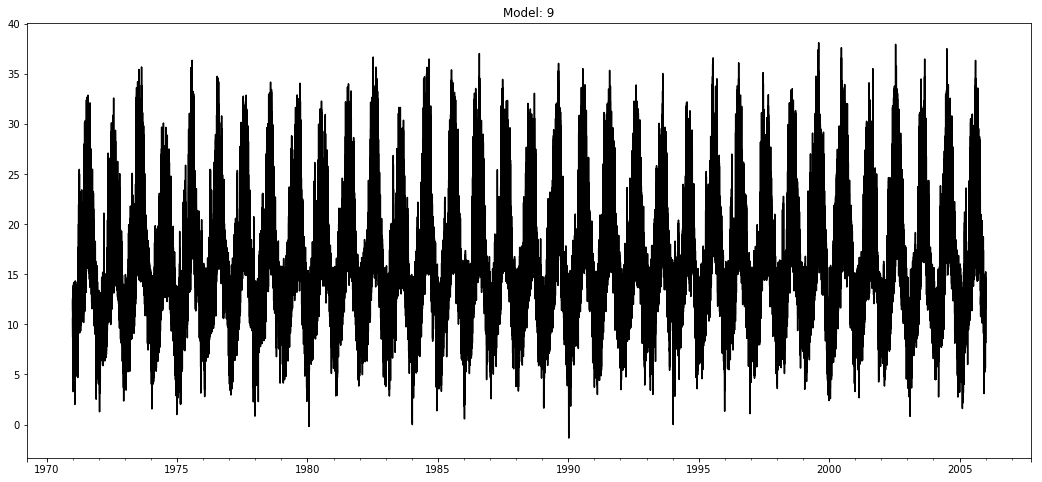

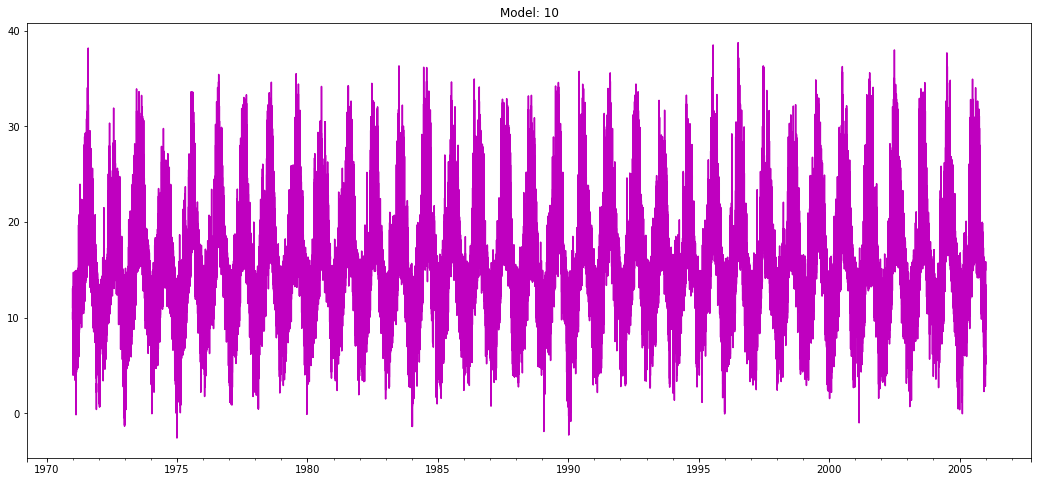

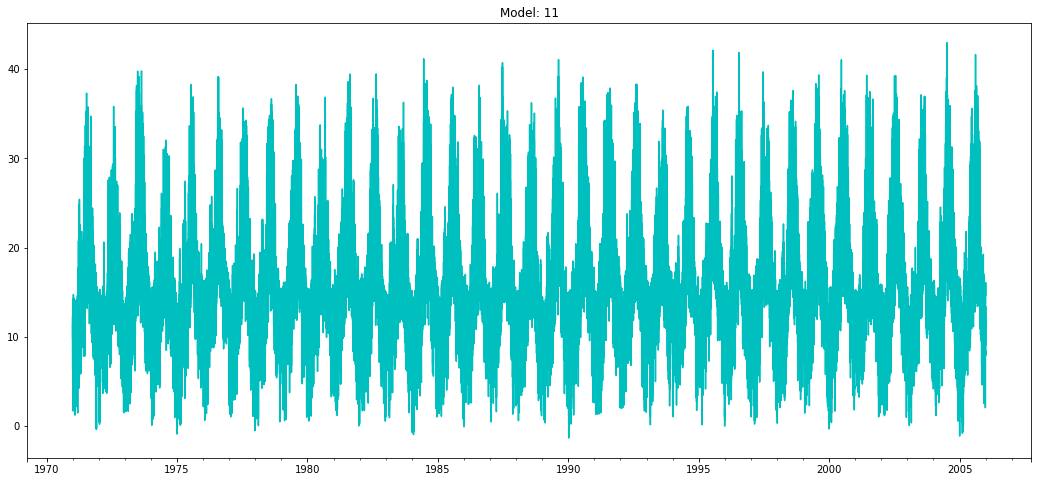

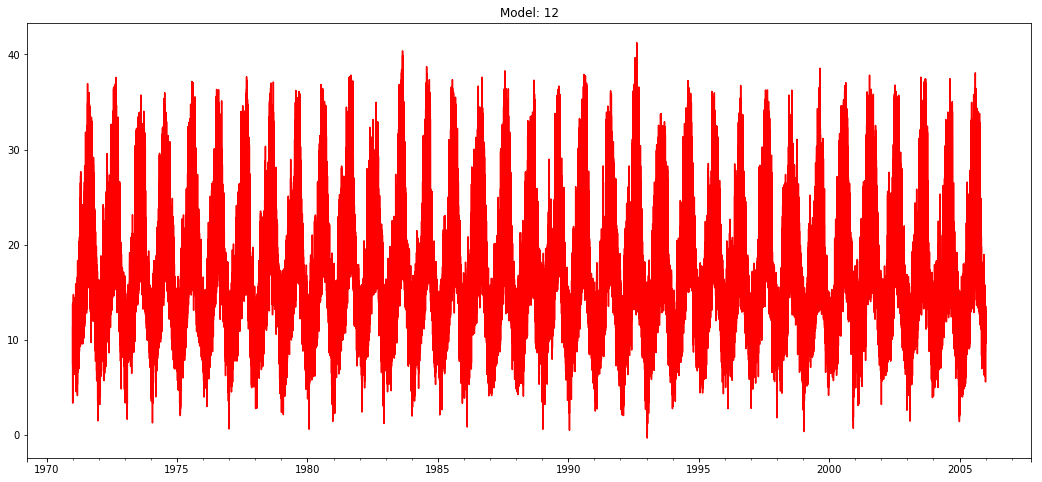

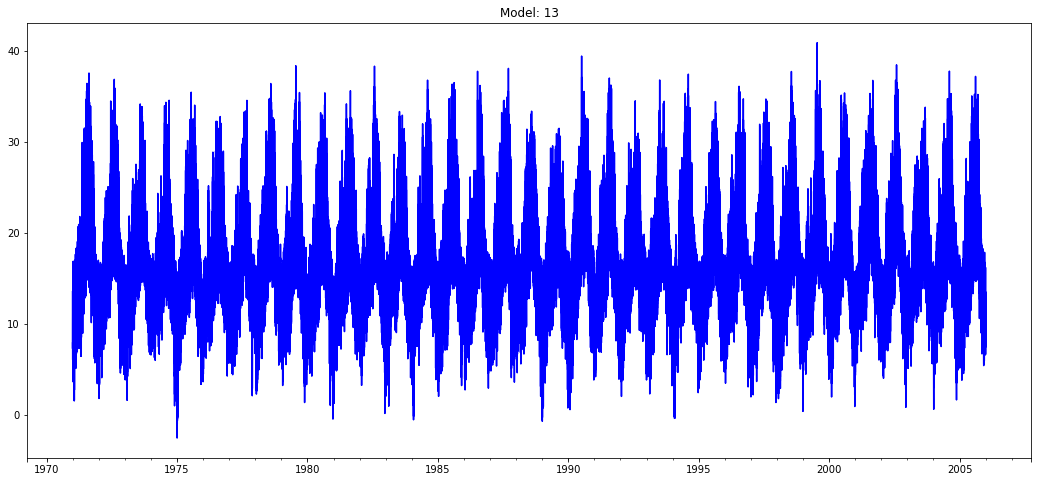

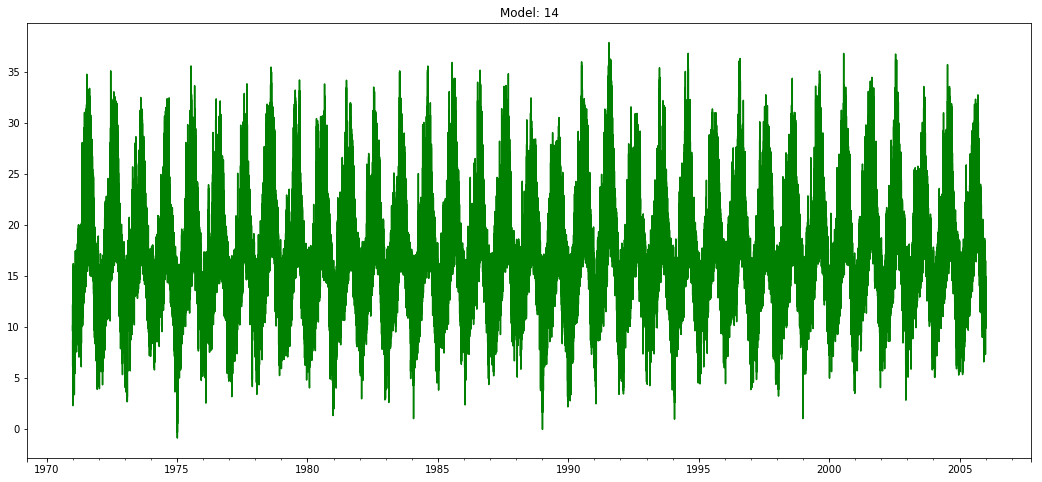

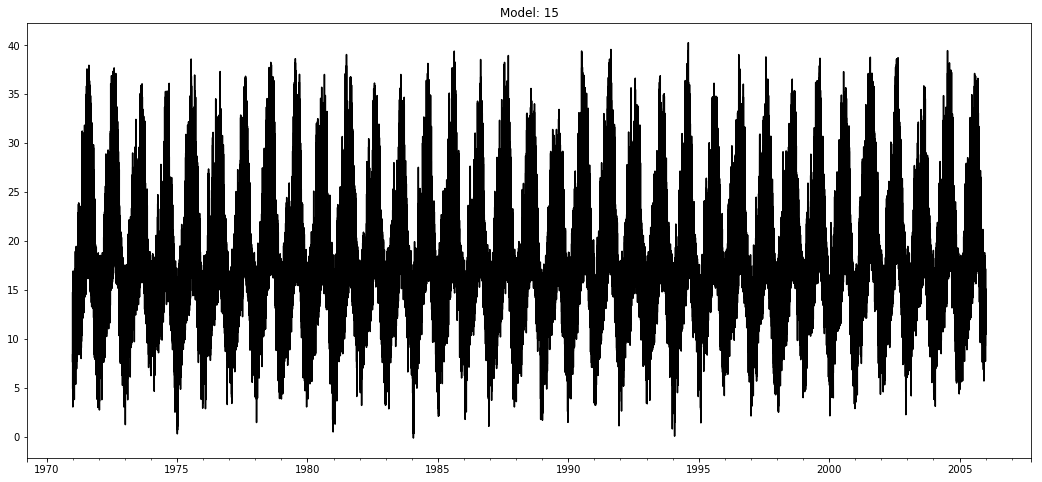

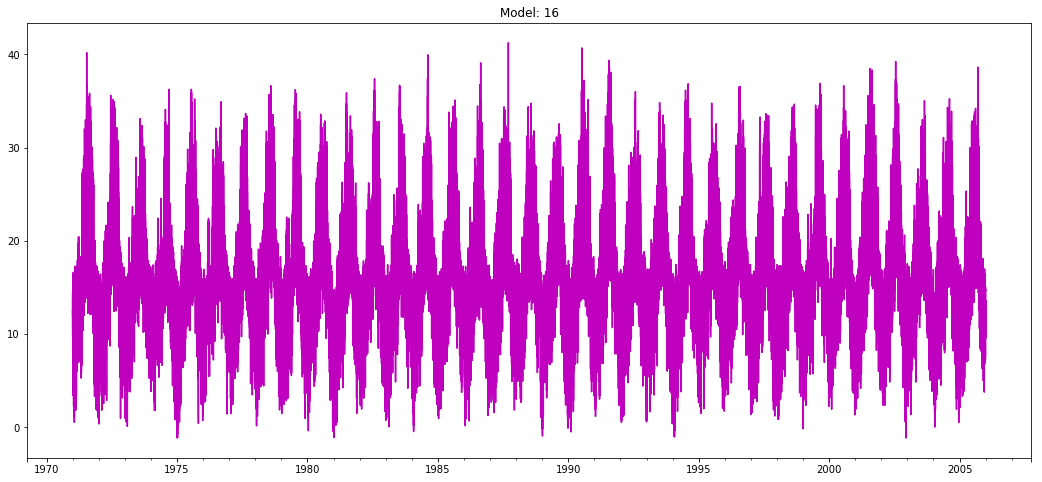

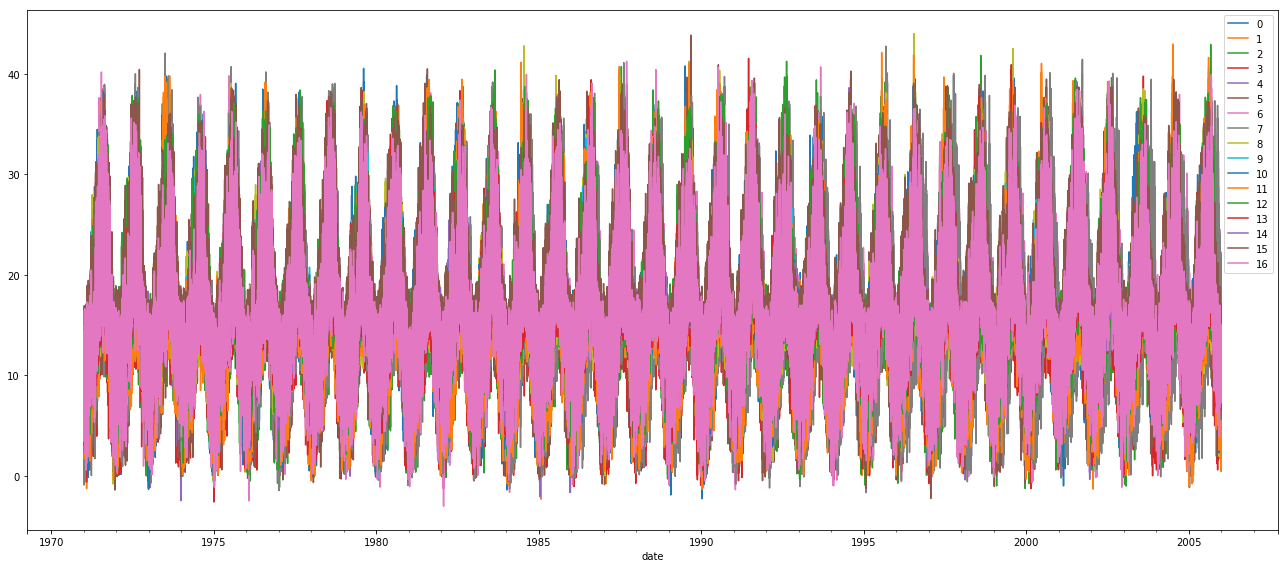

In [4]:
all_models = get_data_models(dir_models = cordex_dataset_path,
                             var_filename = cordex_temp_filename,
                             plot=True)

In [5]:
all_models.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,,
1971-01-01 03:00:00,11.573877,10.219873,7.796777,4.500085,9.082056,6.736353,2.105615,0.020776,11.195581,10.585779,10.513483,11.371576,7.471094,7.883234,10.123956,8.362299,12.527917
1971-01-01 06:00:00,11.497919,10.322900,7.903406,4.211206,8.324976,7.406000,1.757562,-0.169775,10.853387,9.204736,9.784753,10.980371,7.891016,7.256616,10.003381,8.128351,11.757471
1971-01-01 09:00:00,11.607233,10.729211,8.404871,5.657648,7.947656,8.556543,2.873712,0.355463,10.313318,9.037683,10.044489,10.853571,8.202570,7.702448,9.611108,7.612054,11.273065
1971-01-01 12:00:00,12.477899,12.028741,9.991785,10.080072,11.111017,10.376306,5.370782,7.845361,11.161523,11.136255,12.551447,11.921564,12.222345,12.046899,10.863092,12.230707,13.011774
1971-01-01 15:00:00,12.646783,13.028406,10.618127,12.647058,11.988855,9.586450,7.582971,9.079462,12.543817,12.609216,13.067560,12.378809,13.796655,13.591760,12.207239,14.773737,14.443658


#### Testing saving and reloading data

In [6]:
save_df2csv(all_models, 'temp_CORDEX', cordex_output_path, index=True)

In [7]:
all_models_ = load_csv2df('temp_CORDEX.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(all_models_, all_models)

#### Visual inspection - All models Averaged by hour 

<Figure size 180x120 with 0 Axes>

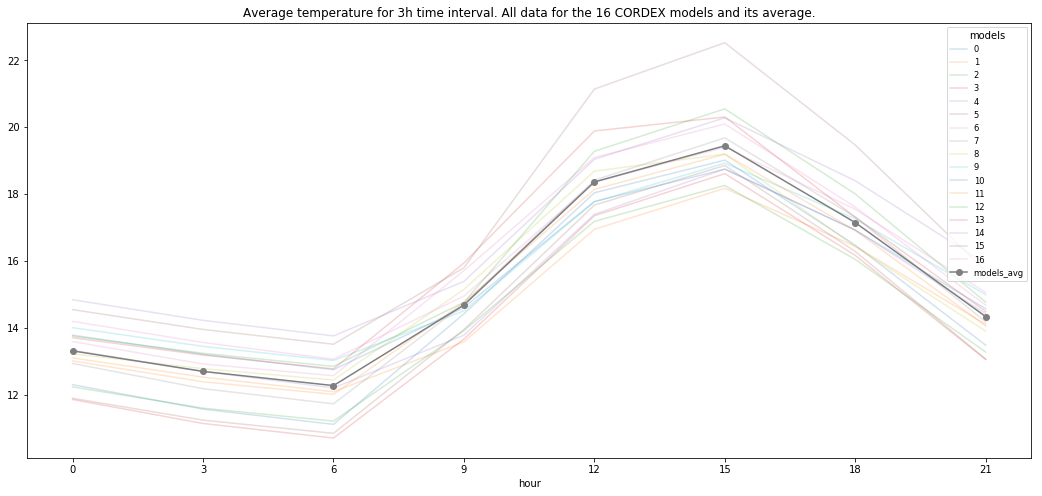

In [8]:
mean_hourly = all_models.groupby(all_models.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

f = plt.figure(dpi=30, facecolor="w")

_ = mean_hourly.plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.legend(labels=list(all_models.columns)+['models_avg'], title="models",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("Average temperature for 3h time interval. All data for the 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'all_cordex_avg', output_dir = plots_output_path)

### Only for 'JJA' and [1979, 2005]

In [9]:
all_models_jja = all_models['1979':'2006']
all_models_jja = filter_ts_by_season(all_models_jja, 'JJA')
all_models_jja = all_models_jja.asfreq('3H')

all_models_jja.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,,
1979-06-01 00:00:00,13.419122,14.471643,14.328729,13.729150,13.672754,10.644250,12.337183,10.969507,16.211725,19.048730,14.766718,16.977441,12.107019,14.522089,15.005762,15.043542,10.745996
1979-06-01 03:00:00,12.501764,14.402551,12.254663,14.001581,13.041925,9.791833,11.918695,10.839319,15.977960,18.184839,15.022180,16.634790,11.559991,14.790338,14.716455,14.938684,11.698389
1979-06-01 06:00:00,11.911584,13.907617,11.871179,13.747766,12.438898,9.561914,12.052179,10.406824,16.152734,17.723444,13.791528,16.666528,11.469415,15.098444,14.315088,15.044244,13.068018
1979-06-01 09:00:00,15.474115,17.524805,18.803857,15.239832,16.544214,12.460474,14.724603,15.226221,22.113336,21.220728,16.057153,18.326074,15.713953,17.690302,15.798486,15.259332,16.350977
1979-06-01 12:00:00,17.844873,19.986719,24.058984,16.716211,21.106104,13.730859,18.498956,18.569238,27.650629,25.784845,17.785272,20.640039,18.421106,20.991083,21.013086,16.919702,19.115137


In [10]:
all_models_jja.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76712 entries, 1979-06-01 00:00:00 to 2005-08-31 21:00:00
Freq: 3H
Data columns (total 17 columns):
0     19872 non-null float64
1     19872 non-null float64
2     19872 non-null float64
3     19872 non-null float64
4     19872 non-null float64
5     19872 non-null float64
6     19872 non-null float64
7     19872 non-null float64
8     19872 non-null float64
9     19872 non-null float64
10    19872 non-null float64
11    19872 non-null float64
12    19872 non-null float64
13    19872 non-null float64
14    19872 non-null float64
15    19872 non-null float64
16    19872 non-null float64
dtypes: float64(17)
memory usage: 10.5 MB


#### Testing saving and reloading data

In [11]:
save_df2csv(all_models_jja, 'temp_CORDEX_1979_2005_jja', cordex_output_path, index=True)

In [12]:
all_models_jja_ = load_csv2df('temp_CORDEX_1979_2005_jja.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(all_models_jja_, all_models_jja)

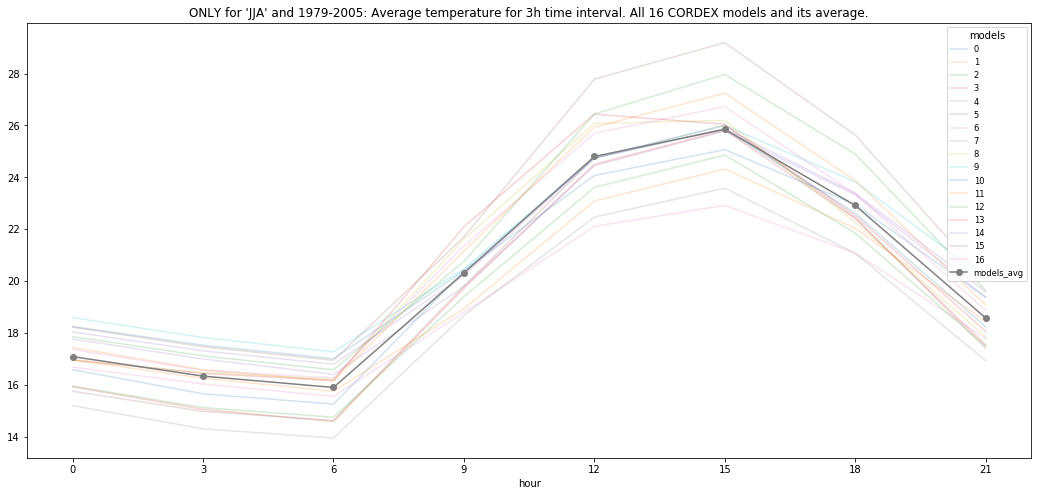

In [13]:
mean_hourly = all_models_jja_.groupby(all_models_jja_.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.legend(labels=list(all_models_jja_.columns)+['models_avg'], title="models",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("ONLY for 'JJA' and 1979-2005: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'all_cordex_avg_jja', output_dir = plots_output_path)

### Get data for all seasons

#### 'DJF'

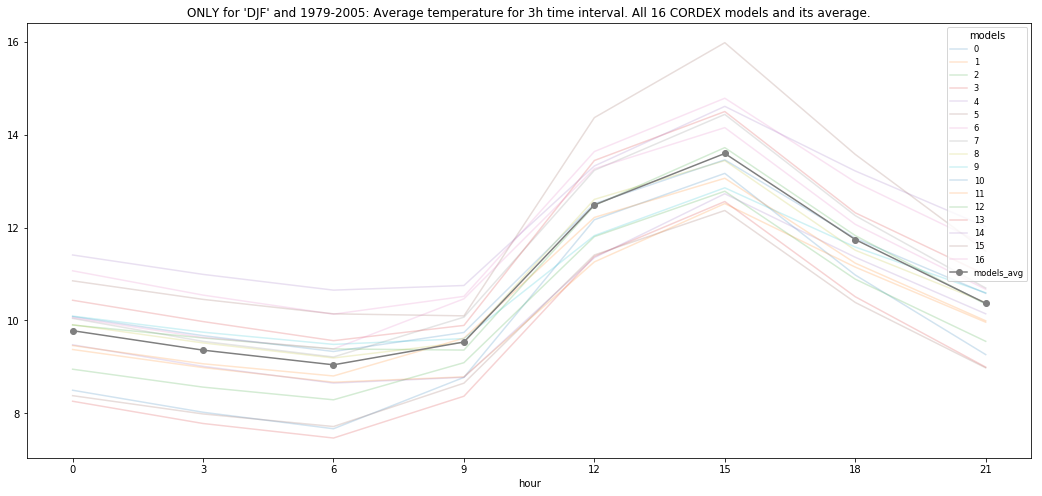

In [14]:
all_models_djf = all_models['1979':'2006']
all_models_djf = filter_ts_by_season(all_models_djf, 'DJF')
all_models_djf = all_models_djf.asfreq('3H')

# print(all_models_djf.head())
# print(all_models_djf.info())
save_df2csv(all_models_djf, 'temp_CORDEX_1979_2005_djf', cordex_output_path, index=True)
all_models_djf_ = load_csv2df('temp_CORDEX_1979_2005_djf.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(all_models_djf_, all_models_djf)

mean_hourly = all_models_djf_.groupby(all_models_djf_.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.legend(labels=list(all_models_djf_.columns)+['models_avg'], title="models",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("ONLY for 'DJF' and 1979-2005: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'all_cordex_avg_djf', output_dir = plots_output_path)

#### 'MAM'

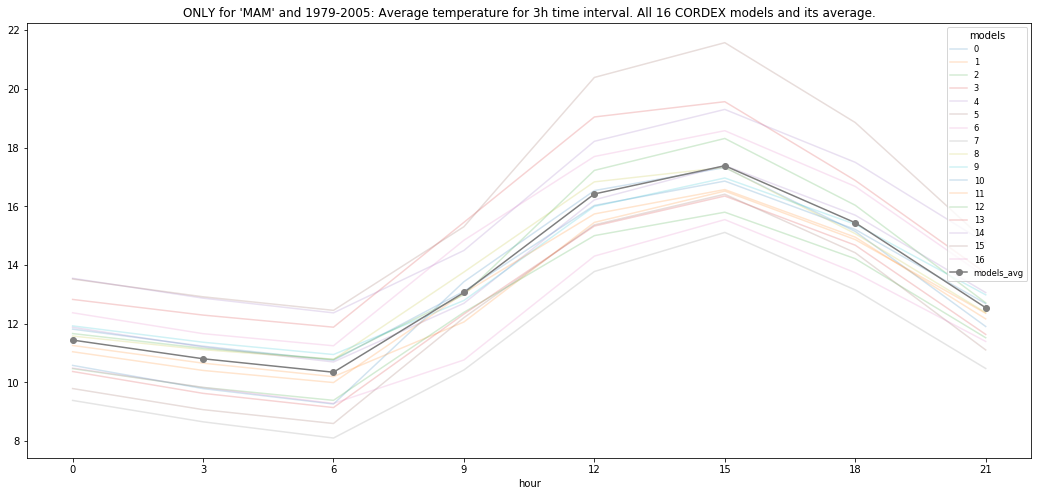

In [15]:
all_models_mam = all_models['1979':'2006']
all_models_mam = filter_ts_by_season(all_models_mam, 'MAM')
all_models_mam = all_models_mam.asfreq('3H')

# print(all_models_mam.head())
#print(all_models_mam.info())
save_df2csv(all_models_mam, 'temp_CORDEX_1979_2005_mam', cordex_output_path, index=True)
all_models_mam_ = load_csv2df('temp_CORDEX_1979_2005_mam.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(all_models_mam_, all_models_mam)

mean_hourly = all_models_mam_.groupby(all_models_mam_.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.legend(labels=list(all_models_mam_.columns)+['models_avg'], title="models",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("ONLY for 'MAM' and 1979-2005: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'all_cordex_avg_mam', output_dir = plots_output_path)

#### 'SON'

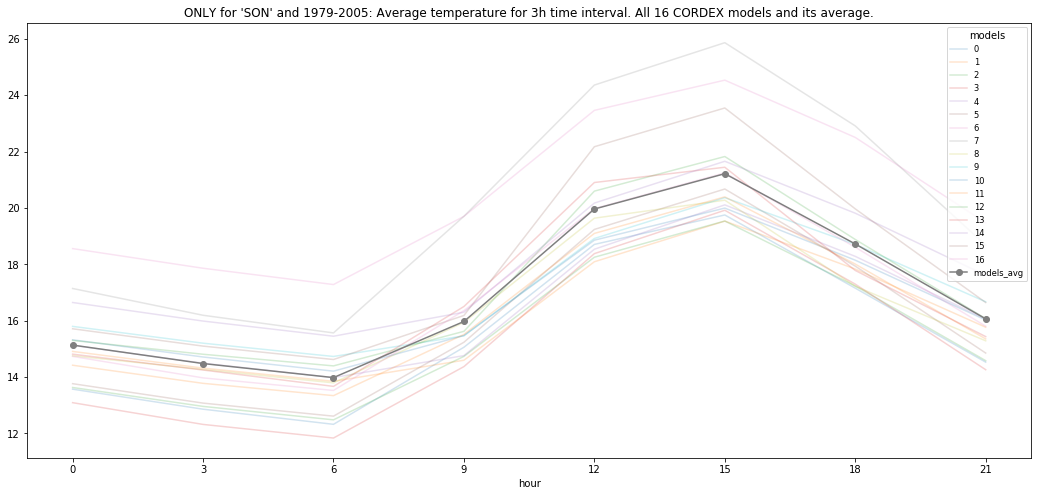

In [16]:
all_models_son = all_models['1979':'2006']
all_models_son = filter_ts_by_season(all_models_son, 'SON')
all_models_son = all_models_son.asfreq('3H')

#print(all_models_son.head())
#print(all_models_son.info())
save_df2csv(all_models_son, 'temp_CORDEX_1979_2005_son', cordex_output_path, index=True)
all_models_son_ = load_csv2df('temp_CORDEX_1979_2005_son.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(all_models_son_, all_models_son)

mean_hourly = all_models_son_.groupby(all_models_son_.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.legend(labels=list(all_models_son_.columns)+['models_avg'], title="models",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("ONLY for 'SON' and 1979-2005: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'all_cordex_avg_son', output_dir = plots_output_path)

# Working in progress

In [ ]:
 plot_season_avg_temp(DC)

In [ ]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF([3, 3, 1, 4])

ecdf([3, 55, 0.5, 1.5])
array([ 0.75,  1.  ,  0.  ,  0.25])

In [ ]:
# MORE
# COMPUTE THE PDF for each model JJA joining (pooling toghether) all hours and by hour

In [ ]:
# COMPUTE several percentiles (1,5,25,50,75,95,99) of the temperature for each model
# at each hour during JJA

In [ ]:
# (por exemplo: qual o percentil95 da temperatura para cada model às 15h)
# AS PDFs e PERCENTIS TB PODEM SER COMPARADAS COM OBSERVACOES -> VER Perkins S-SCORE

### BITs

In [ ]:
# Paper's model names matching with the folders data

full_model_names = [name.lower() for name in folders]
full_model_names

model_names = ['CNRMCM5_ALADIN',
'MPIESM_COSMO',
'NORESM_COSMO',
'CNRMCM5_HIRHAM',
'ECEARTH_HIRHAM',
'MPIESM_HIRHAM',
'NORESM_HIRHAM',
'HADGEM_REGCM',
'MPIESM_REGCM',
'MPIESM_REMO',
'CNRMCM5_SMHIRCA',
'ECEARTH_SMHIRCA',
'HADGEM_SMHIRCA',
'IPSLCM5_SMHIRCA',
'MPIESM_SMHIRCA',
'NORESM_SMHIRCA']

model_names = [tuple(name.lower().split('_')) for name in model_names]
model_names

for name in model_names:
    for full_name in full_model_names:
        if (name[0] in full_name) and name[1] in full_name:
            print(name, full_name)

In [ ]:
A= np.array([[[1, 2, 3], [1, 2, 3]], [[4, 5, 6], [4, 5, 6]]])
A

In [ ]:
A.shape

In [ ]:
B = np.array([[7, 8, 9], [7, 8, 9]])[np.newaxis, :]
# B = B[np.newaxis, :]
B, B.shape

In [ ]:
np.append(A, B, axis=0 )

In [ ]:
np.r_[A,B]

In [ ]:
a = np.array([1,2,3,4,5])
b = np.array(['x','y','g','o', 'm']) 
a, b

In [ ]:
b[a>3]

In [ ]:
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')

In [ ]:
pd.Series(range(3), index=pd.date_range('2000', freq='D', periods=3))

In [ ]:
pd.Series(range(102271), index=pd.date_range(start = '01-01-1971 03', end = '31-12-2005 21', freq='3H', dayfirst=True ))

### Descriptive Stats

In [ ]:
def get_precentiles(df, by='hour', percentiles = [1,5,25,50,75,95,99]):
    if by == 'hour':
        by = df.index.hour
    return df.groupby(by=by).describe(percentiles = np.asarray(percentiles)/100)

In [ ]:
models_desc = get_precentiles(all_models_, by='hour', percentiles = [1,5,25,50,75,95,99])
models_desc

In [ ]:
# model_0 = all_models_[[0]]
# model_0.head()

In [ ]:
model_0 = all_models_[[0]]
print(model_0.shape)
model_0.head()

In [ ]:
resampled = model_0.resample('D').agg(['mean', 'std'])#.add_suffix('_0')
resampled.shape

In [ ]:
resampled.head()

In [ ]:
def custom(s):
    return s.median()

d = pd.concat([model_0.resample('D').apply(custom), resampled], axis=1).loc['2004',:]
d.head()
# .plot(figsize=(18,8))


In [ ]:
pd.concat([model_0, model_0.resample('D').agg(['mean', 'median', 'std'])], axis=1).loc['2004', ].plot()

In [ ]:
ax = model_0['2005'].plot(figsize=(18,8));
daily_mean = model_0.resample('D').mean().add_suffix('_mean')
daily_mean['2005'].plot(ax=ax)

### For one model the mean temp using rolling window 

In [ ]:
# rolling obj
model_0_90 = model_0.rolling(window=90*8).agg(['mean', 'std']).add_suffix('_90')
model_0_360 = model_0.rolling(window=360*8).agg(['mean', 'std']).add_suffix('_180')

model_0_smooth = pd.concat([model_0_90, model_0_360], axis=1)

In [ ]:
ax = model_0.plot(color='grey', alpha=0.3)
model_0_smooth.plot(ax=ax, figsize=(18,8))
plt.legend(labels=['0', 'mean_90', 'std_90', 'mean_360', 'std_360'])
plt.title('....');


### Rolling Quantiles

In [ ]:
# rolling obj
model_0_90_q1 = model_0.rolling(window=90*8).quantile(0.01, center=True)
model_0_90_q5 = model_0.rolling(window=90*8).quantile(0.05, center=True)
model_0_90_q95 = model_0.rolling(window=90*8).quantile(0.95, center=True)
model_0_90_q99 = model_0.rolling(window=90*8).quantile(0.99, center=True)
# model_0_360 = model_0.rolling(window=360*8).agg(['mean', 'std']).add_suffix('_180')

model_0_q = pd.concat([model_0_90_q1, model_0_90_q5, model_0_90_q95, model_0_90_q99], axis=1)

In [ ]:
ax = model_0.plot(color='grey', alpha=0.3)
model_0_q.plot(ax=ax, figsize=(18,12))
plt.legend(labels=['0', 'q_1%', 'q_5%', 'q_95%', 'q_99%'])
plt.title('....');

In [ ]:
# just for...
# idx = ((model_0.index >= '1971') & (model_0.index < '1972')) | (model_0.index > '2004') 
idx =  (model_0.index > '2004')

ax = model_0.loc[idx,:].plot(color='grey', alpha=0.3)
model_0_q.loc[idx,:].plot(ax=ax, figsize=(18,12))
plt.legend(labels=['0', 'q_1%', 'q_5%', 'q_95%', 'q_99%'])
plt.title('....');

In [ ]:
model_0.first('D')

In [ ]:
model_0.diff()

In [ ]:
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')